In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
from NEAT.genome import Genome
l: list[Genome] = []
g = Genome(2, 3)
for i in range(5):
    l.append(g)

In [30]:
for i in range(len(l)):
    l[i].mutate()

In [31]:
for i in range(len(l)):
    for nodes, conn in l[i].connections.genes.items():
        print(nodes, conn.Weight, conn.Enabled, conn.Innovation)

(1, 3) -0.01702807142400001 False 1
(1, 4) -0.98 False 2
(1, 5) 0.6253844889600003 False 3
(2, 3) 0.4147200000000001 False 4
(2, 4) -0.004252614524928003 True 5
(2, 5) -2.5245 True 6
(1, 6) 0.05100000000000001 False 7
(6, 5) -0.86 True 8
(1, 7) 0.022384460986216142 True 9
(7, 4) 1.5313036677120009 True 10
(7, 6) -0.44400000000000006 True 11
(1, 8) 0.0013122000000000003 False 12
(8, 3) -0.9 True 13
(1, 9) 0.33 True 14
(9, 6) 3.0600000000000005 True 15
(1, 3) -0.01702807142400001 False 1
(1, 4) -0.98 False 2
(1, 5) 0.6253844889600003 False 3
(2, 3) 0.4147200000000001 False 4
(2, 4) -0.004252614524928003 True 5
(2, 5) -2.5245 True 6
(1, 6) 0.05100000000000001 False 7
(6, 5) -0.86 True 8
(1, 7) 0.022384460986216142 True 9
(7, 4) 1.5313036677120009 True 10
(7, 6) -0.44400000000000006 True 11
(1, 8) 0.0013122000000000003 False 12
(8, 3) -0.9 True 13
(1, 9) 0.33 True 14
(9, 6) 3.0600000000000005 True 15
(1, 3) -0.01702807142400001 False 1
(1, 4) -0.98 False 2
(1, 5) 0.6253844889600003 False 3

In [2]:
from NEAT.genome import Genome

g1 = Genome(2, 3)

In [3]:
for i in range(20):
    g1.mutate()

In [4]:
for i in g1.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT


In [5]:
list_edges = []
for nodes, conn in g1.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges.append(nodes)

(1, 3) 0.08 False 1
(1, 4) -1.8144 True 2
(1, 5) 0.06726774600000004 True 3
(2, 3) -0.0021502921789440027 True 4
(2, 4) 1.329256656000001 True 5
(2, 5) -0.63 False 6


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT


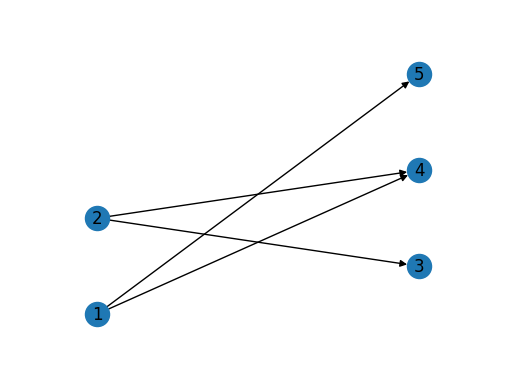

In [6]:
left_nodes = []
middle_nodes = []
right_nodes = []

for i in g1.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes.append(i.id)
    else:   # OUTPUT
        right_nodes.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

G = nx.DiGraph()
G.add_edges_from(list_edges)
nx.draw_networkx(G, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [7]:
from NEAT.neural_network import NeuralNetwork

nn1 = NeuralNetwork(g1)
nn2 = NeuralNetwork(g1)

print(nn1.forward({1: 0.5, 2: 1.2}))
print(nn2.forward({1: 0.5, 2: 1.2}))


[0.4993549127042439, 0.6655013866198146, 0.5084076756751698]
[0.4993549127042439, 0.6655013866198146, 0.5084076756751698]


In [8]:
g2 = Genome(2, 3)
for i in range(20):
    g2.mutate()

In [9]:
for i in g2.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN


In [10]:
list_edges2 = []
list_conn2 = []
for nodes, conn in g2.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    list_conn2.append(conn)
    if conn.Enabled:
        list_edges2.append(nodes)

(1, 3) 0.395 True 1
(1, 4) -0.07902720000000002 True 2
(1, 5) 1.7736576000000008 False 3
(2, 3) -0.010382359680000005 True 4
(2, 4) -0.008160000000000002 False 5
(2, 5) 0.02317579264000002 True 6
(1, 6) -0.007207759416000004 True 7
(6, 5) -0.9382334976000007 False 8
(6, 7) -0.9718800000000004 True 9
(7, 5) 0.2330496000000002 False 10
(7, 8) -2.2777200000000004 True 11
(8, 5) 0.12383280000000009 True 12
(1, 7) 0.08944000000000002 False 13


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN


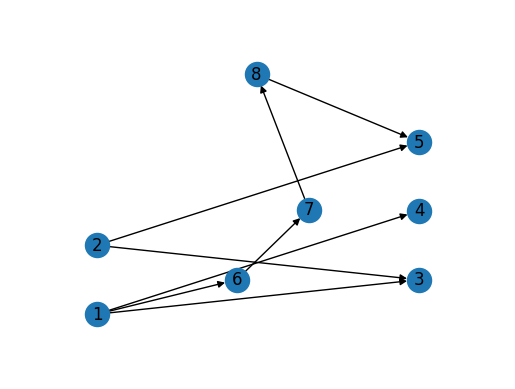

In [11]:
left_nodes2 = []
middle_nodes2 = []
right_nodes2 = []

for i in g2.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes2.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes2.append(i.id)
    else:   # OUTPUT
        right_nodes2.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes2)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes2)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes2)})

G2 = nx.DiGraph()
G2.add_edges_from(list_edges2)
nx.draw_networkx(G2, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [12]:
nn = NeuralNetwork(g2)

print(nn.forward({1: 0.5, 2: 1.2}))

[0.5461287455605514, 0.4901228850817558, 0.5370830000416752]


In [13]:
from NEAT.species import Species

g1.fitness = 1
g2.fitness = 0.5

gens = [g1, g2]

In [14]:
s = Species(.5, gens, 1, 1, 1)
offspring: Genome = s.cross_over(g1, g2)

In [15]:
for i in offspring.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN


In [16]:
list_edges3 = []
for nodes, conn in offspring.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges3.append(nodes)

(1, 7) 0.08944000000000002 False 13
(8, 5) 0.12383280000000009 True 12
(7, 8) -2.2777200000000004 True 11
(7, 5) 0.2330496000000002 False 10
(6, 7) -0.9718800000000004 True 9
(6, 5) -0.9382334976000007 False 8
(1, 6) -0.007207759416000004 True 7
(2, 5) -0.30341210368 False 6
(2, 4) 0.6605483280000005 True 5
(2, 3) -0.006266325929472004 True 4
(1, 5) 0.9204626730000004 True 3
(1, 4) -0.9467136 True 2
(1, 3) 0.23750000000000002 False 1


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN


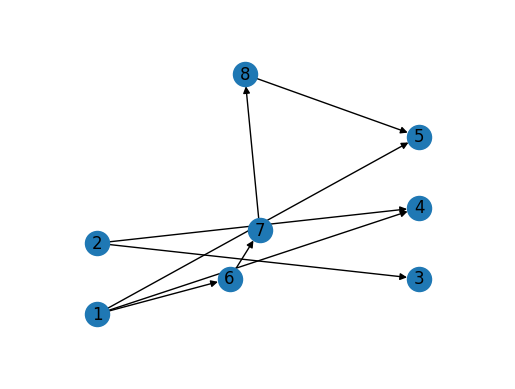

In [17]:
left_nodes3 = []
middle_nodes3 = []
right_nodes3 = []

for i in offspring.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes3.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes3.append(i.id)
    else:   # OUTPUT
        right_nodes3.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes3)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes3)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes3)})

G3 = nx.DiGraph()
G3.add_edges_from(list_edges3)
nx.draw_networkx(G3, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [18]:
nn = NeuralNetwork(offspring)

print(nn.forward({1: 0.5, 2: 1.2}))

[0.4981201110792258, 0.5791539382401414, 0.867414176433322]
